# Random Forest – Classification Model
### Dataset: Iris Dataset

This notebook is implementing a **random forest** classification model using the Iris dataset. The goal is to classify the flowers with similar species based on *sepal length*, *sepal width*, *petal length*, and *petal width*.

The categories of the Iris species are as follows: 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'.

### Import Packages

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

### Import Dataset

In [13]:
df = pd.read_csv('Iris.csv')

# preview data
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
# view data types of columns
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [15]:
# display information on the columns included number of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [16]:
# split the data by features (X) and the target variable (y)
y = df['Species']
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

In [17]:
# split the data into training and test sets. I am using 30% of the data for testing.
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (105, 4) (105,)
Test set: (45, 4) (45,)


In [18]:
# set the number of trees for the model
rf = RandomForestClassifier(n_estimators= 35, random_state= 42)

# fit the model
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=35, random_state=42)

#### Note:
As the dataset only has 150 rows of data, the default number of trees (100), seemed a bit overkill, so I tested the model with various numbers of trees and found the sweetspot was 35, which was able to give me 97.77% accuracy for the model. Anything less dropped my accuracy to 95.55%, which is still a good fit for the data. 

In [19]:
# test model accuracy
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
print(f'Model Accuracy: {accuracy:.2f}%')

Model Accuracy: 97.78%


### Visualize Trees

There are 35 trees in the model. As such, I chose to visualize the first, 16th, and 31st trees in the model to get an idea of how the data interacted with the model.

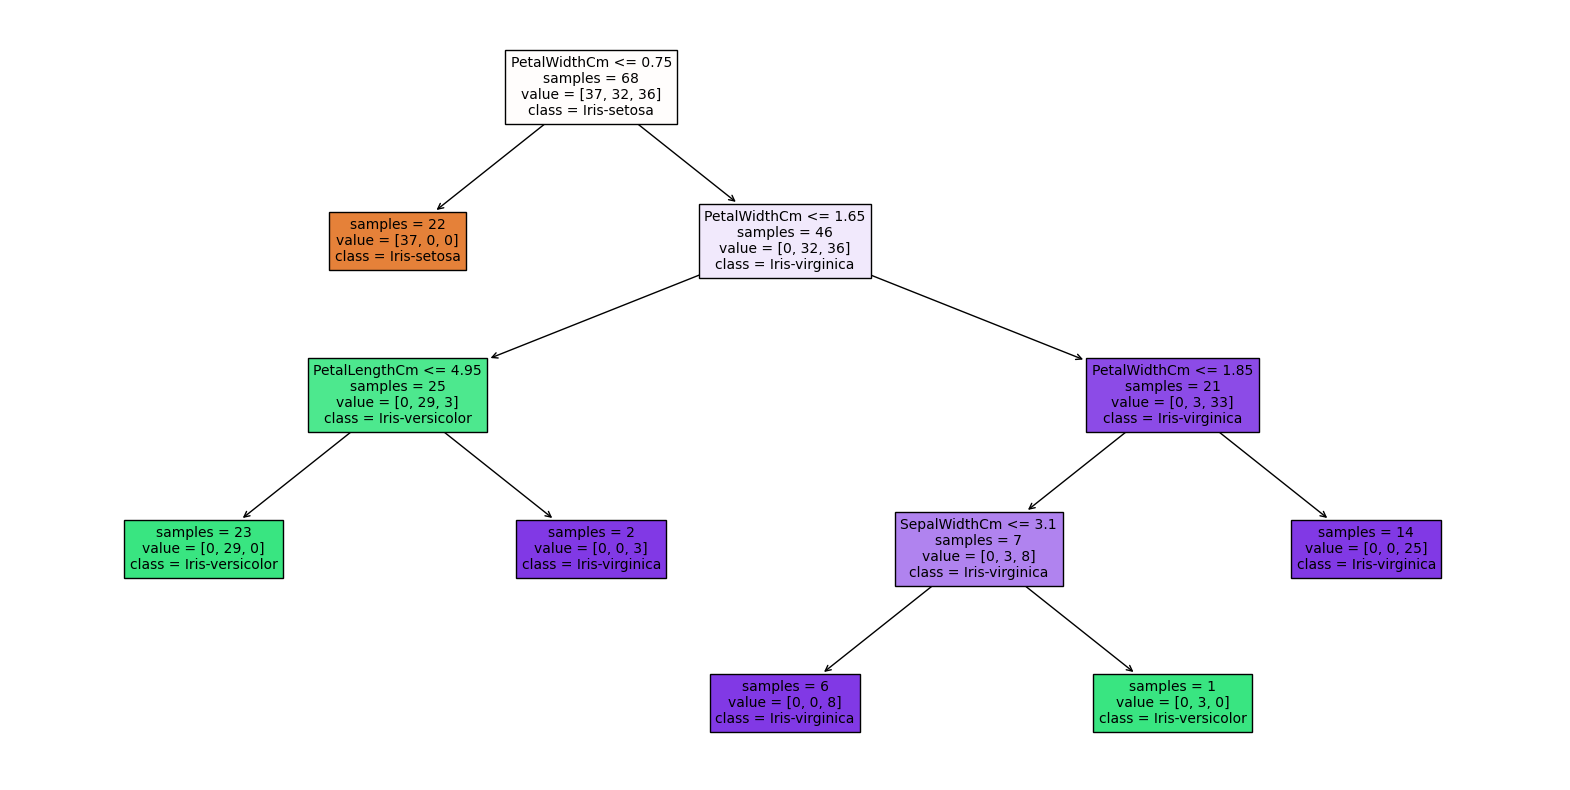

In [20]:
class_names = df['Species'].unique()

chosen_tree = rf.estimators_[0]

plt.figure(figsize=(20,10))
plot_tree(chosen_tree, 
          feature_names=X_train.columns, 
          class_names=class_names, 
          filled=True, 
          impurity=False, 
          fontsize=10)

plt.show()

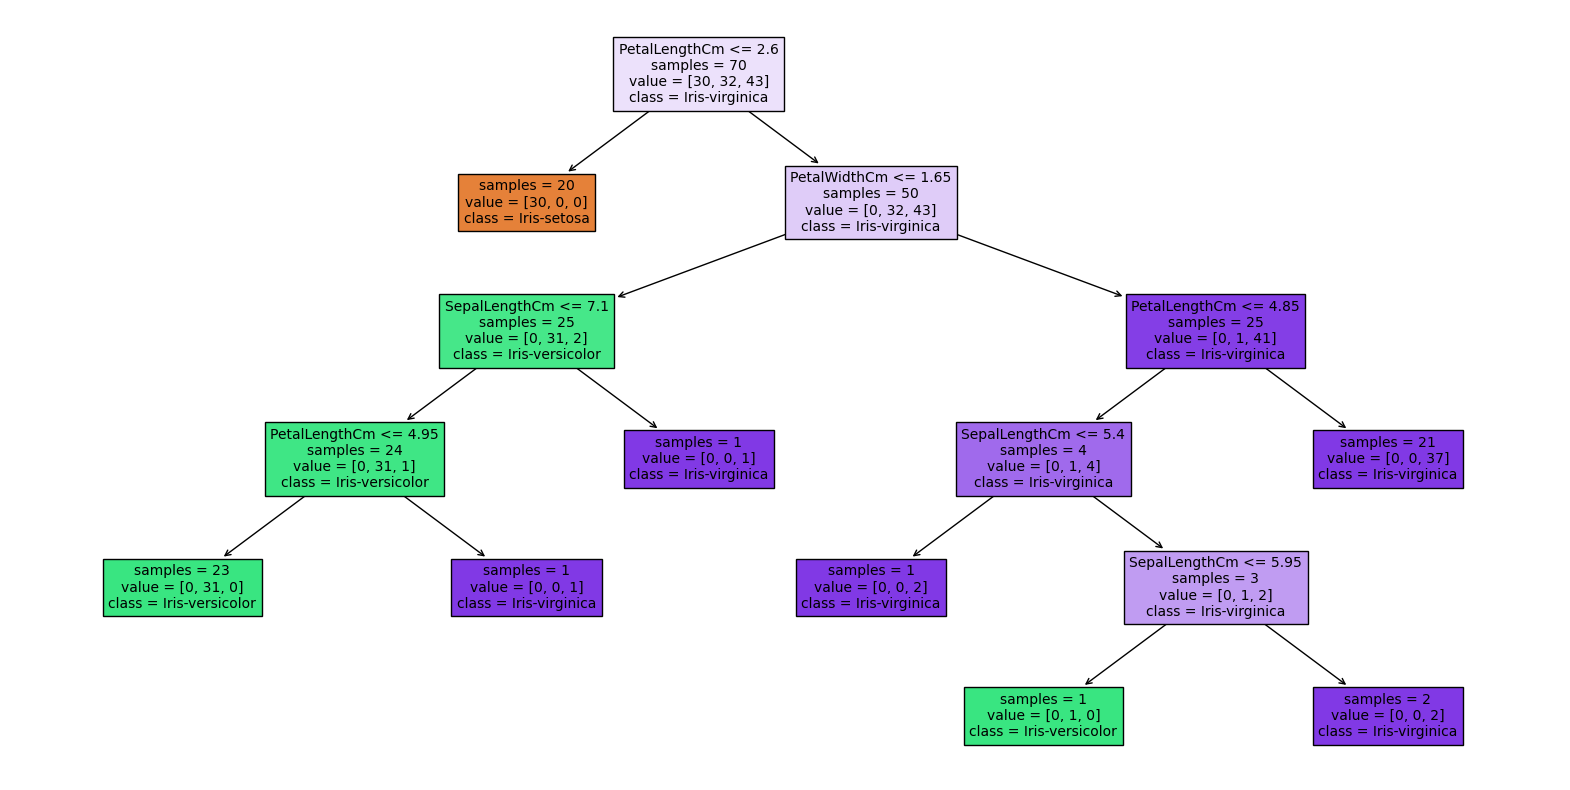

In [21]:
class_names = df['Species'].unique()

chosen_tree = rf.estimators_[15]

plt.figure(figsize=(20,10))
plot_tree(chosen_tree, 
          feature_names=X_train.columns, 
          class_names=class_names, 
          filled=True, 
          impurity=False, 
          fontsize=10)

plt.show()

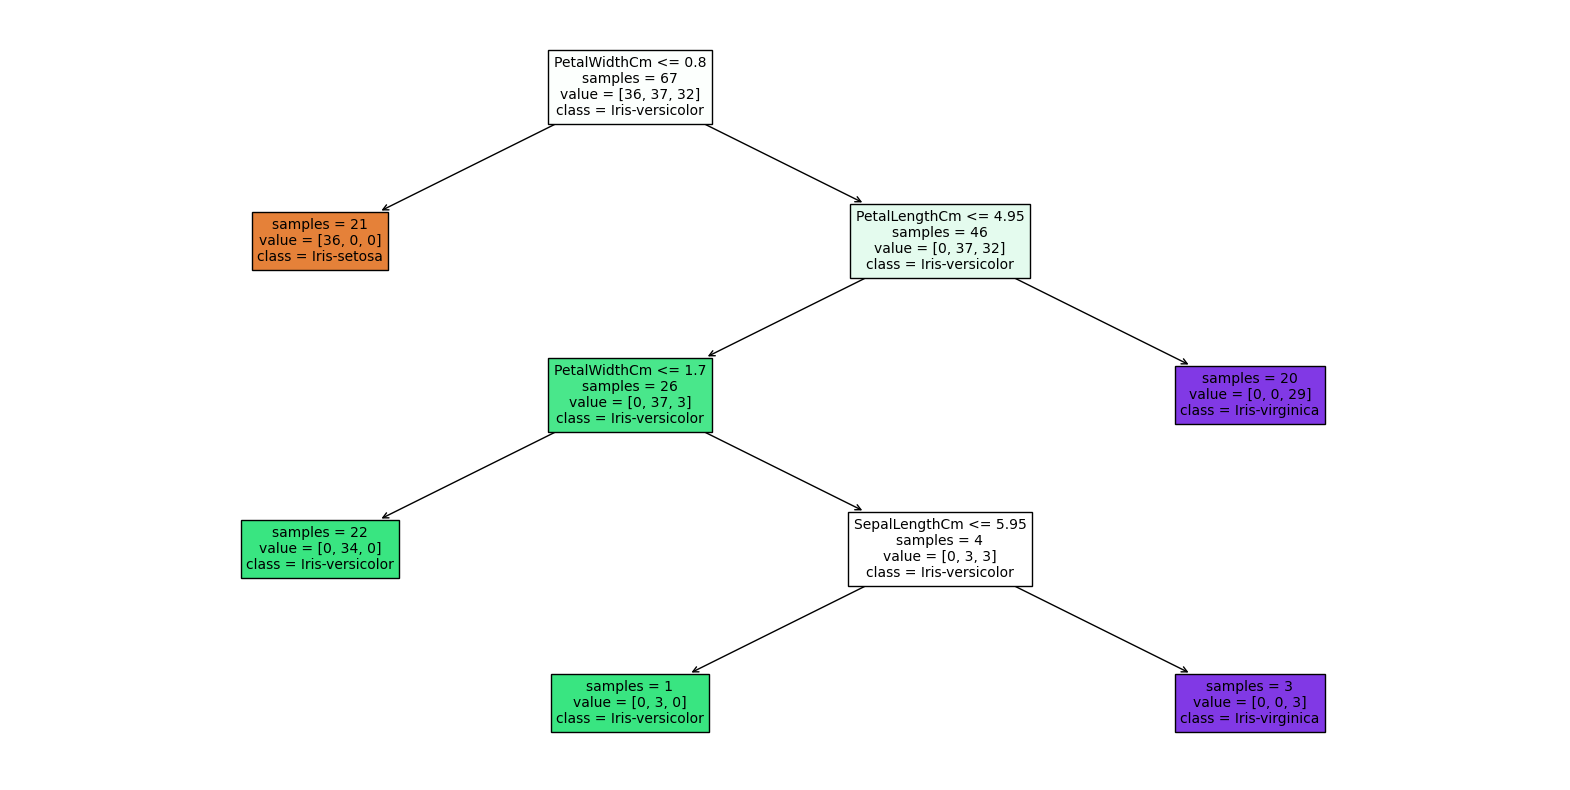

In [22]:
class_names = df['Species'].unique()

chosen_tree = rf.estimators_[30]

plt.figure(figsize=(20,10))
plot_tree(chosen_tree, 
          feature_names=X_train.columns, 
          class_names=class_names, 
          filled=True, 
          impurity=False, 
          fontsize=10)

plt.show()